# House Price Prediction using LinearRegression

### Import corresponding Libraries

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn import metrics

import csv

### Loading the dataset and doing the preprocessing steps

In [76]:
raw_data = pd.read_csv('data/Housing.csv')

for i in range(0, len(raw_data['hotwaterheating'].values)):
    if raw_data['hotwaterheating'].values[i] == 'no':
        raw_data['hotwaterheating'].values[i] = 0
    else:
        raw_data['hotwaterheating'].values[i] = 1
        
for i in range(0, len(raw_data['mainroad'].values)):
    if raw_data['mainroad'].values[i] == 'no':
        raw_data['mainroad'].values[i] = 0
    else:
        raw_data['mainroad'].values[i] = 1

for i in range(0, len(raw_data['guestroom'].values)):
    if raw_data['guestroom'].values[i] == 'no':
        raw_data['guestroom'].values[i] = 0
    else:
        raw_data['guestroom'].values[i] = 1

for i in range(0, len(raw_data['basement'].values)):
    if raw_data['basement'].values[i] == 'no':
        raw_data['basement'].values[i] = 0
    else:
        raw_data['basement'].values[i] = 1
        
for i in range(0, len(raw_data['airconditioning'].values)):
    if raw_data['airconditioning'].values[i] == 'no':
        raw_data['airconditioning'].values[i] = 0
    else:
        raw_data['airconditioning'].values[i] = 1

for i in range(0, len(raw_data['prefarea'].values)):
    if raw_data['prefarea'].values[i] == 'no':
        raw_data['prefarea'].values[i] = 0
    else:
        raw_data['prefarea'].values[i] = 1

### Visualizing the raw data

In [59]:
raw_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


### Plotting the raw data using seaborn

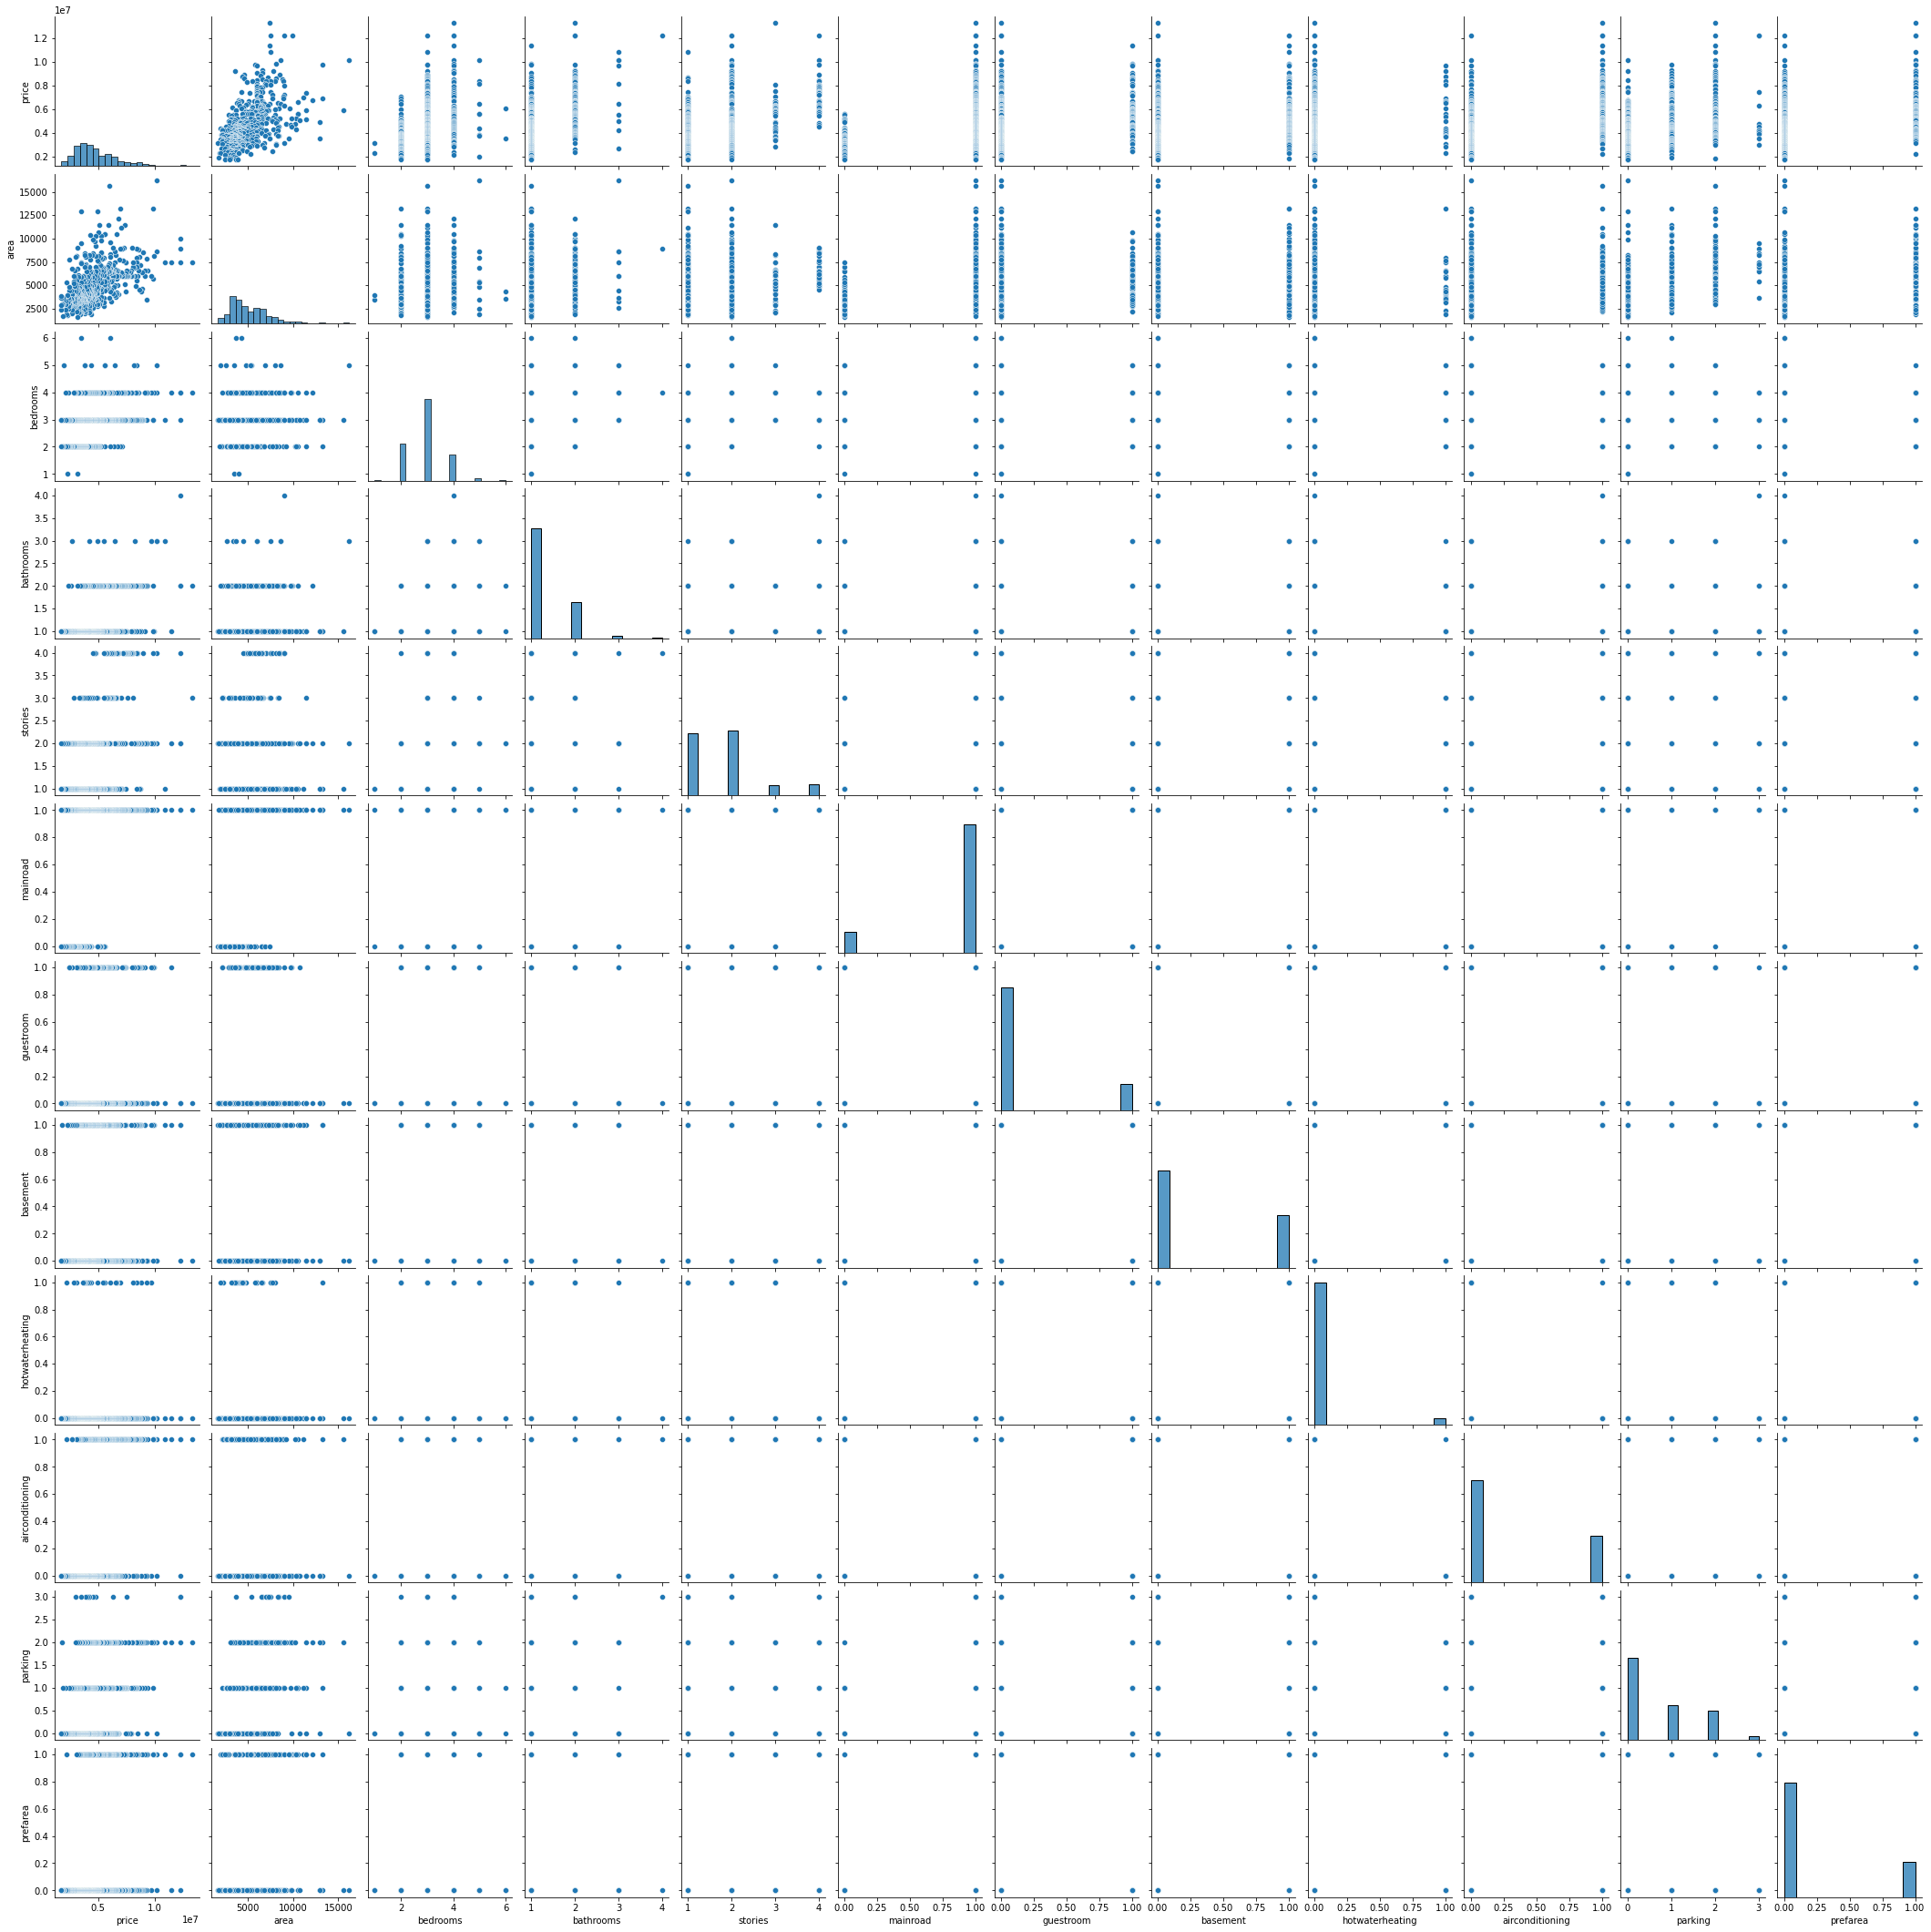

In [60]:
sns.pairplot(raw_data)

### Assigning the input features to x variable

In [61]:
x = raw_data[['area','bedrooms','bathrooms','stories','parking', 'mainroad', 'hotwaterheating', 'guestroom', 'basement', 'airconditioning', 'prefarea']]

### Assigning the input features to y variable

In [62]:
y = raw_data['price']

### Splitting the dataset into train and test datasets

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

### creating the LinearRegression object and assigning it to model

In [64]:
model = LinearRegression()

### Training the LinearRegression model

In [65]:
model.fit(x_train, y_train)

LinearRegression()

### Printing the coefficient values of the trained model

In [66]:
print(model.coef_)

[2.53442410e+02 1.85250291e+05 1.01949488e+06 4.19777829e+05
 3.61851573e+05 6.30425223e+05 8.40808665e+05 2.63420990e+05
 3.09829891e+05 9.48011796e+05 6.49224424e+05]


### Printing the intercept values of the trained model

In [67]:
print(model.intercept_)

-544918.4956237739


In [68]:
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
area,2.534424e+02
bedrooms,1.852503e+05
bathrooms,1.019495e+06
stories,4.197778e+05
parking,3.618516e+05
mainroad,6.304252e+05
hotwaterheating,8.408087e+05
guestroom,2.634210e+05
basement,3.098299e+05
airconditioning,9.480118e+05


In [69]:
predictions = model.predict(x_test)

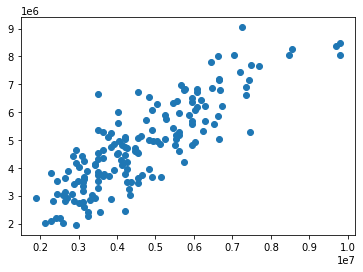

In [70]:
plt.scatter(y_test, predictions)

(array([ 1.,  1.,  8., 19., 31., 41., 31., 20.,  9.,  3.]),
 array([-3142790.1762621 , -2611139.84312917, -2079489.50999624,
        -1547839.17686331, -1016188.84373039,  -484538.51059746,
           47111.82253547,   578762.1556684 ,  1110412.48880132,
         1642062.82193425,  2173713.15506718]),
 <BarContainer object of 10 artists>)

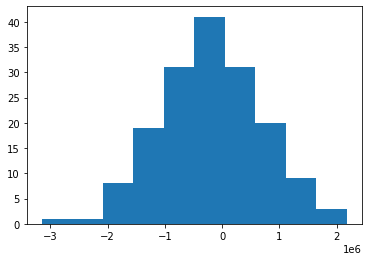

In [71]:
plt.hist(y_test - predictions)

In [73]:
metrics.mean_absolute_error(y_test, predictions)

715870.2657277847

In [74]:
metrics.mean_squared_error(y_test, predictions)

809223567990.3287

In [75]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

899568.5454651739